用于基于模型预测

本文件预测一个末端轨迹服从XoY平面内一封闭圆周的运动序列

7.5cm, 1cm

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import torch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib ipympl

In [35]:
input_size = 3
hidden_size = 32
output_size = 3
num_epochs = 200
num_layers = 2
learning_rate = 0.001 
dropout = 0.2

In [36]:
import os
os.getcwd() #得到当前工作目录

'g:\\我的云端硬盘\\Soft robotic arm\\code&data\\code\\trajectory_tracking'

In [37]:
TRAINING_SET = '../../training_sets/3dof.csv' # training set
training_set = '1sdelaymiddlestep4'
MODEL_PATH = '../model_training/models'
TEST_FILE  = '../../test_sets/No3x4.csv' # testing set
FIGURE_PATH = './figures'
TARGET_CTRL_PRES = './control_presets'

In [38]:
# create an empty list to hold the sequences
training_data = []

# read the CSV file and split it into sequences
with open(TRAINING_SET, newline='') as f:
    reader = csv.reader(f)
    sequence = []
    for row in reader:
        if row[0] == '':  # empty row indicates end of sequence
            training_data.append(sequence)
            sequence = []
        else:
            # convert the row to a list of floats and append to the sequence
            row_float = [float(x) for x in row]
            sequence.append(row_float)
    # append the final sequence
    if sequence:
        training_data.append(sequence)

# print the number of sequences in the training set
print(len(training_data),len(training_data[0]),len(training_data[0][0]))

3 51 6


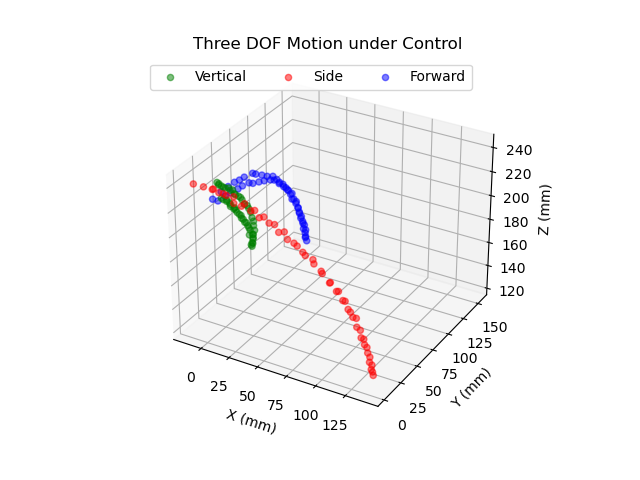

In [39]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter([x[3] for x in training_data[2]], [-x[4] for x in training_data[2]], [x[5] for x in training_data[2]], alpha=0.5, c='g', marker='o', label='Vertical')
scatter = ax.scatter([x[3] for x in training_data[0]], [-x[4] for x in training_data[0]], [x[5] for x in training_data[0]], alpha=0.5, c='r', marker='o', label='Side')
scatter = ax.scatter([x[3] for x in training_data[1]], [-x[4] for x in training_data[1]], [x[5] for x in training_data[1]], alpha=0.5, c='b', marker='o', label='Forward')
         
# Add labels to the plot
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('Three DOF Motion under Control')
ax.legend(loc='upper left', ncols=3)

# Normalize the axes to achieve equal scaling
ax.set_box_aspect([5,5,4])

# Show the plot
plt.show()

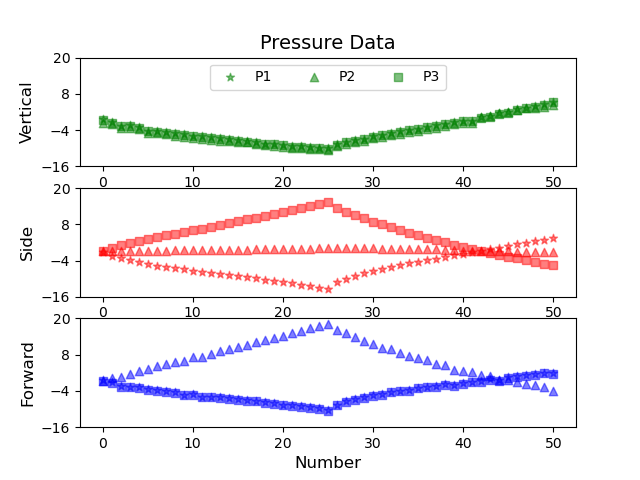

In [40]:
# plot the pressure data in three subplots
t0 = np.arange(len(training_data[0]))
t1 = np.arange(len(training_data[1]))
t2 = np.arange(len(training_data[2]))
fig = plt.figure()
plt.subplot(3,1,1)
plt.scatter(t0, [x[0] for x in training_data[2]], marker='*', color='g', alpha=0.5, label='P1')
plt.scatter(t1, [x[1] for x in training_data[2]], marker='^', color='g', alpha=0.5, label='P2')
plt.scatter(t2, [x[2] for x in training_data[2]], marker='s', color='g', alpha=0.5, label='P3')
plt.title('Pressure Data', fontsize=14)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.legend(loc='upper center', fontsize=10, ncol=3)
plt.ylabel('Vertical', fontsize=12)
plt.subplot(3,1,2)
plt.scatter(t0, [x[0] for x in training_data[0]], marker='*', color='r', alpha=0.5)
plt.scatter(t1, [x[1] for x in training_data[0]], marker='^', color='r', alpha=0.5)
plt.scatter(t2, [x[2] for x in training_data[0]], marker='s', color='r', alpha=0.5)
plt.ylabel('Side', fontsize=12)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.subplot(3,1,3)
plt.scatter(t0, [x[0] for x in training_data[1]], marker='*', color='b', alpha=0.5)
plt.scatter(t1, [x[1] for x in training_data[1]], marker='^', color='b', alpha=0.5)
plt.scatter(t2, [x[2] for x in training_data[1]], marker='s', color='b', alpha=0.5)
plt.tick_params(labelsize=10)
plt.ylabel('Forward', fontsize=12)
plt.xlabel('Number', fontsize=12)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.show()

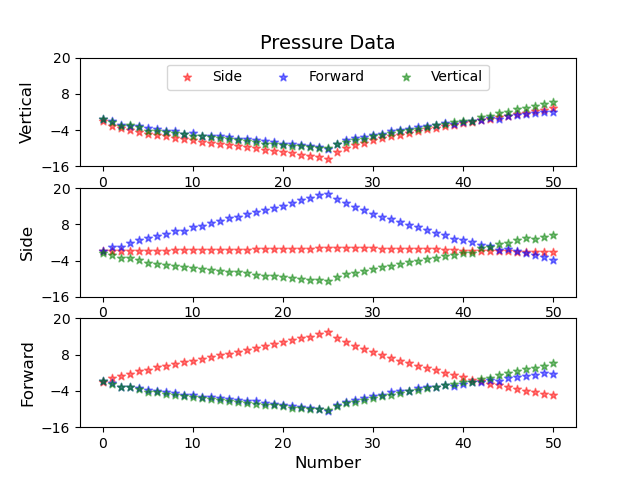

In [41]:
# plot the pressure data in three subplots
t0 = np.arange(len(training_data[0]))
t1 = np.arange(len(training_data[1]))
t2 = np.arange(len(training_data[2]))
fig = plt.figure()
plt.subplot(3,1,1)
plt.scatter(t0, [x[0] for x in training_data[0]], marker='*', color='r', alpha=0.5, label='Side')
plt.scatter(t1, [x[0] for x in training_data[1]], marker='*', color='b', alpha=0.5, label='Forward')
plt.scatter(t2, [x[0] for x in training_data[2]], marker='*', color='g', alpha=0.5, label='Vertical')
plt.title('Pressure Data', fontsize=14)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.legend(loc='upper center', fontsize=10, ncol=3)
plt.ylabel('Vertical', fontsize=12)
plt.subplot(3,1,2)
plt.scatter(t0, [x[1] for x in training_data[0]], marker='*', color='r', alpha=0.5)
plt.scatter(t1, [x[1] for x in training_data[1]], marker='*', color='b', alpha=0.5)
plt.scatter(t2, [x[1] for x in training_data[2]], marker='*', color='g', alpha=0.5)
plt.ylabel('Side', fontsize=12)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.subplot(3,1,3)
plt.scatter(t0, [x[2] for x in training_data[0]], marker='*', color='r', alpha=0.5)
plt.scatter(t1, [x[2] for x in training_data[1]], marker='*', color='b', alpha=0.5)
plt.scatter(t2, [x[2] for x in training_data[2]], marker='*', color='g', alpha=0.5)
plt.tick_params(labelsize=10)
plt.ylabel('Forward', fontsize=12)
plt.xlabel('Number', fontsize=12)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.show()

Pressure Comparison

In [42]:
TRAINING_SET = '../../training_sets/no_foam.csv' # training set

# create an empty list to hold the sequences
training_data = []

# read the CSV file and split it into sequences
with open(TRAINING_SET, newline='') as f:
    reader = csv.reader(f)
    sequence = []
    for row in reader:
        if row[0] == '':  # empty row indicates end of sequence
            training_data.append(sequence)
            sequence = []
        else:
            # convert the row to a list of floats and append to the sequence
            row_float = [float(x) for x in row]
            sequence.append(row_float)
    # append the final sequence
    if sequence:
        training_data.append(sequence)

# print the number of sequences in the training set
print(len(training_data),len(training_data[0]),len(training_data[0][0]))

2 51 6


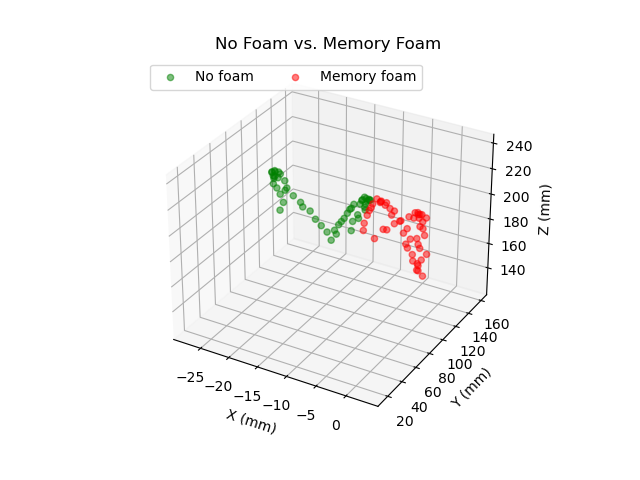

In [43]:
# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter([x[3] for x in training_data[0]], [-x[4] for x in training_data[0]], [x[5] for x in training_data[0]], alpha=0.5, c='g', marker='o', label='No foam')
scatter = ax.scatter([x[3] for x in training_data[1]], [-x[4] for x in training_data[1]], [x[5] for x in training_data[1]], alpha=0.5, c='r', marker='o', label='Memory foam')

# add labels to the plot
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title('No Foam vs. Memory Foam')
ax.legend(loc='upper left', fontsize=10, ncol=2)

# normalize the axes to achieve equal scaling
ax.set_box_aspect([5,5,4])

# show the plot
plt.show()


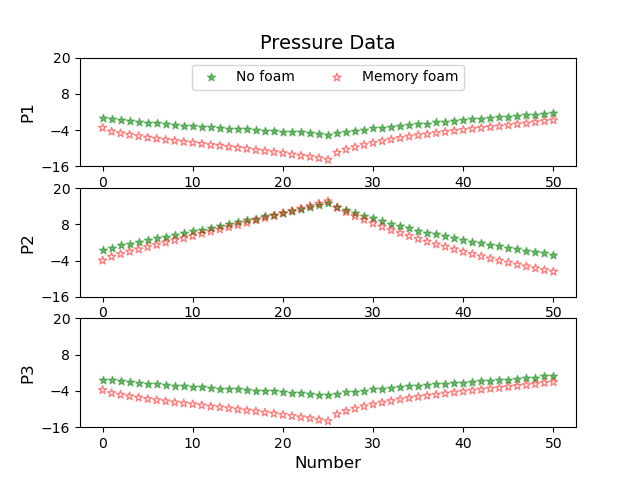

In [44]:
# plot the pressure data in three subplots
t0 = np.arange(len(training_data[0]))
t1 = np.arange(len(training_data[1]))
fig = plt.figure()
plt.subplot(3,1,1)
plt.scatter(t0, [x[0] for x in training_data[0]], marker='*', color='g', alpha=0.5, label='No foam')
plt.scatter(t1, [x[0] for x in training_data[1]], marker='*', facecolors='none', color='r', alpha=0.5, label='Memory foam')
plt.title('Pressure Data', fontsize=14)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.legend(loc='upper center', fontsize=10, ncol=3)
plt.ylabel('P1', fontsize=12)
plt.subplot(3,1,2)
plt.scatter(t0, [x[1] for x in training_data[0]], marker='*', color='g', alpha=0.5, label='No foam')
plt.scatter(t1, [x[1] for x in training_data[1]], marker='*', facecolors='none', color='r', alpha=0.5, label='Memory foam')
plt.ylabel('P2', fontsize=12)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.subplot(3,1,3)
plt.scatter(t0, [x[2] for x in training_data[0]], marker='*', color='g', alpha=0.5, label='No foam')
plt.scatter(t1, [x[2] for x in training_data[1]], marker='*', facecolors='none', color='r', alpha=0.5, label='Memory foam')
plt.tick_params(labelsize=10)
plt.ylabel('P3', fontsize=12)
plt.xlabel('Number', fontsize=12)
plt.ylim(-16, 20)
plt.yticks(np.arange(-16, 32, 12))
plt.show()
